# Real-World Challenge
**Scenario**: <br>
A client wants to automate flower species identification from petal/sepal measurements (Iris 
dataset). They need a REST API that receives measurements and returns the predicted species. 
- Build the solution end-to-end: 
    - Train a model on the Iris dataset. 
    - Deploy it as a FastAPI service. 
    - Demonstrate the API with sample requests.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

## Loading Iris Dataset

In [2]:
iris = load_iris(as_frame= True)
X, y = iris.data, iris.target

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y.unique()

array([0, 1, 2])

## Visualization
For better and easy to understand visualization, I will use only two features.

In [5]:
X_visual = iris.data[['petal length (cm)', 'petal width (cm)']].values

In [6]:
X_visual[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [7]:
tree_clf = DecisionTreeClassifier(max_depth= 3, random_state= 42)
tree_clf.fit(X_visual, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(0.375, 0.875, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[0] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

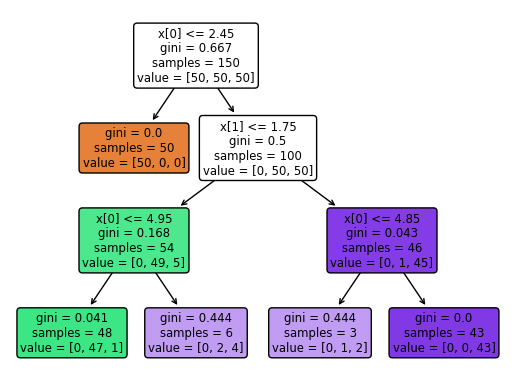

In [8]:
plot_tree(tree_clf, rounded= True, filled= True)

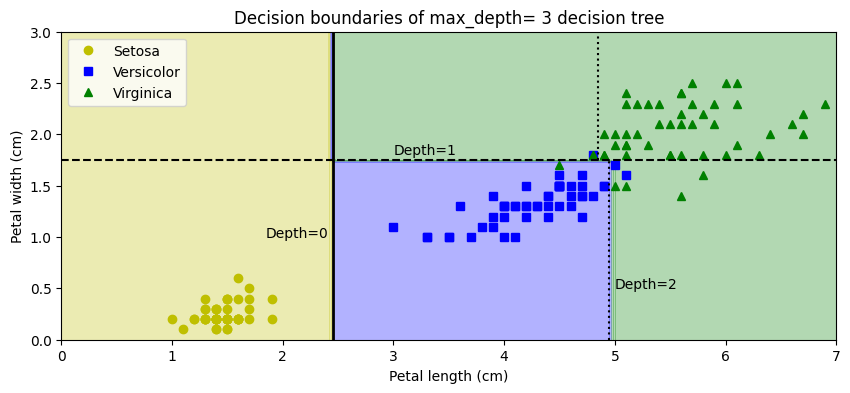

In [9]:
# getting thresholds
th1, th2, th3, th4 = tree_clf.tree_.threshold[[0, 2, 3, 6]]

plt.figure(figsize= (10, 4))

# iris data
plt.plot(X_visual[y == 0, 0], X_visual[y == 0, 1], 'yo', label= 'Setosa')
plt.plot(X_visual[y == 1, 0], X_visual[y == 1, 1], 'bs', label= 'Versicolor')
plt.plot(X_visual[y == 2, 0], X_visual[y == 2, 1], 'g^', label= 'Virginica')

# contours
custom_cmap = ListedColormap(['y', 'b', 'g'])

x0, x1 = np.meshgrid(np.linspace(0, 7, 100), np.linspace(0, 3, 100))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = tree_clf.predict(X_new).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, alpha= 0.3, cmap= custom_cmap)

# decision boundaries
plt.plot([th1, th1], [0, 3], 'k-', linewidth= 2)
plt.plot([0, 7], [th2, th2], 'k--')
plt.plot([th3, th3], [0, th2], 'k:')
plt.plot([th4, th4], [th2, 3], 'k:')

# text labels to different depths
plt.text(th1 - 0.6, 1, 'Depth=0')
plt.text(3, th2 + 0.06, 'Depth=1')
plt.text(5, 0.5, 'Depth=2')

# extra stuff
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Decision boundaries of max_depth= 3 decision tree')
plt.legend()
plt.axis([0, 7, 0, 3])
plt.show()

### Let's try a better visualizaiton of decision boundaries using PCA.

In [10]:
pca_pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components= 2)
)
X_rotated = pca_pipe.fit_transform(X)    # on entire dataset


tree_pca = DecisionTreeClassifier(max_depth= 3, random_state= 42)
tree_pca.fit(X_rotated, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

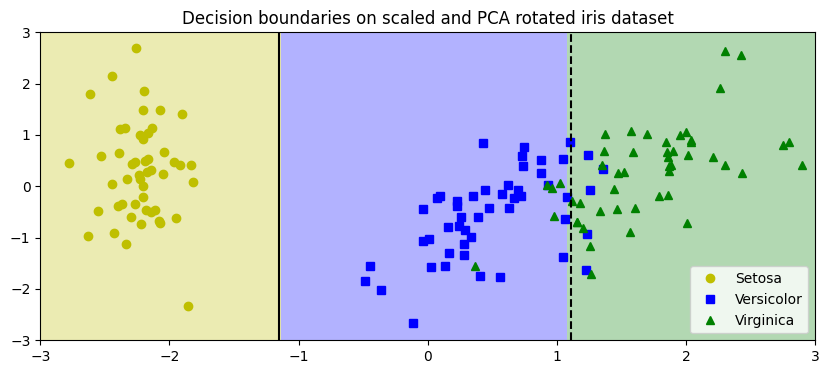

In [11]:
th1, th2 = tree_pca.tree_.threshold[[0, 2]]

plt.figure(figsize= (10, 4))

plt.plot(X_rotated[y == 0, 0], X_rotated[y == 0, 1], 'yo', label= 'Setosa')
plt.plot(X_rotated[y == 1, 0], X_rotated[y == 1, 1], 'bs', label= 'Versicolor')
plt.plot(X_rotated[y == 2, 0], X_rotated[y == 2, 1], 'g^', label= 'Virginica')

custom_cmap = ListedColormap(['y', 'b', 'g'])

x0, x1 = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = tree_pca.predict(X_new).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, alpha= 0.3, cmap= custom_cmap)

plt.plot([th1, th1], [-3, 3], 'k-')
plt.plot([th2, th2], [-3, 3], 'k--')

plt.legend()
plt.title('Decision boundaries on scaled and PCA rotated iris dataset')
plt.axis([-3, 3, -3, 3])
plt.show()

From the above visualizations we can conclude that `Setosa` is the easiest to differ from the other flowers. `Versicolor` & `Virginica` are very close to each other so it will be challenging for our model to classifiy them properly. So now let's fine-tune a Decision Tree Classifier over all the features, but first we have to split our datset into training and testing set.

## Splitting dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [13]:
[len(data) for data in [X_train, X_test, y_train, y_test]]

[120, 30, 120, 30]

## Trying a decision tree with default hyperparameters

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

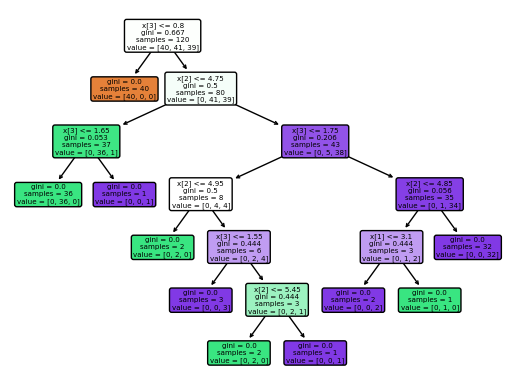

In [15]:
plot_tree(model, filled= True, rounded= True)

In [16]:
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [17]:
print(f'Accuracy: {accuracy_score(y_test, predictions):.2%}')

Accuracy: 100.00%


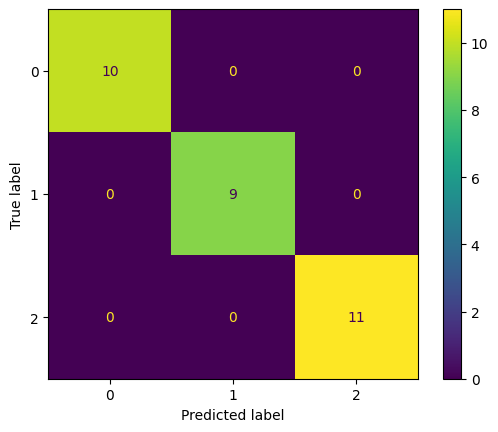

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

## Saving model

In [19]:
import pickle

In [20]:
with open('iris_classifier_dt.pkl', 'wb') as f:
    pickle.dump(model, f)